# Episode 5 - Measure Fitness
	หลังจากทดสอบผลลัพธ์ของ AI ที่ Train แล้วขั้นตอนที่สุดที่ขาดเสียไม่ได้เลยก็คือ การประเมินผลของการ Train ของ AI เพื่อวัดว่า AI ประสิทธิภาพแต่ไหน หรือ AI Fitness แล้วหรือไม่โดยมีตัวอย่างผลการประเมินดังนี้  

In [1]:
import gym
import numpy as np
from gymclass import Notebook
%matplotlib inline

In [2]:
env = gym.make("LunarLander-v2")
env = env.unwrapped
env.seed(1)

/Users/millenniumfalcon/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[1]

In [3]:
%%time
import time
from dqn_agent import DQNAgent


agent = DQNAgent(state_size=8, action_size=4, seed=0, hidden_layer1=64, hidden_layer2=108)


# Load ข้อมูลการ train จาก ep3 

load_path = "output/LunarLander-Train-Results.ckpt"
agent.load(load_path)


steps = 1000
episode_rewards = [] 
episodes = 500

observation = env.reset()
for ep in Notebook.log_progress(range(episodes)):
    episode_reward = 0.0
    observation = env.reset()
    tic = time.perf_counter() 
    for t in range(steps):
        action = agent.act(observation)
        observation, reward, done, info = env.step(action)
        episode_reward += reward

        # Oops Crashed or flew away, stops early 
        if episode_reward<-250:
            done = True
        if done:
            break
    episode_rewards.append(episode_reward)
    
    
overall_average_reward = np.mean(episode_rewards)
overall_std_reward = np.std(episode_rewards)
print("100 Tries Average Reward=", overall_average_reward)
print("100 Tries Reward Standard Deviation=", overall_std_reward)
print("100 Tries Fitness Percent =", agent.fitness(overall_average_reward))

100 Tries Average Reward= 148.19165184192155
100 Tries Reward Standard Deviation= 76.52854385030616
100 Tries Fitness Percent = 24.095825920960777
CPU times: user 5min 20s, sys: 1.1 s, total: 5min 21s
Wall time: 5min 22s


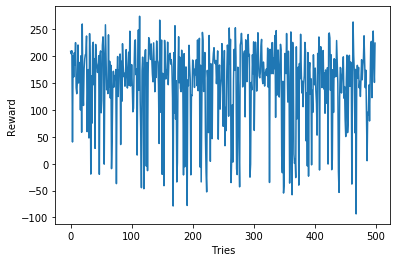

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(episode_rewards)), episode_rewards)
plt.ylabel('Reward')
plt.xlabel('Tries')
plt.savefig("Fitness.png")
plt.show()

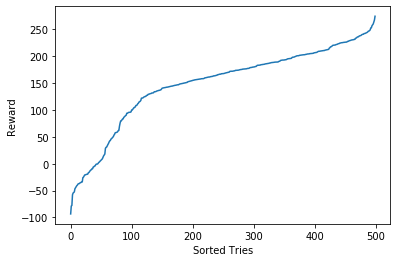

Above 200 reward from the  370  percentile


In [5]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(episode_rewards)), sorted(episode_rewards))
plt.ylabel('Reward')
plt.xlabel('Sorted Tries')
plt.savefig("Fitness.png")
plt.show()
count = 0;
for i in sorted(episode_rewards):
    count +=1
    if i>=200:
        break
print("Above 200 reward from the ", count, " percentile") 